In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [69]:
df= pd.read_csv("covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [70]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


# EDA

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


In [73]:
df.isnull().sum()*100/df.shape[0]

Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
dtype: float64

In [74]:
df.duplicated().sum()

0

In [75]:
df.Date.value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

## <span style="color:orange"> Observations:
-   Around 70% of Province/State are NaN
-   No other column has Null/NaN values
-   No Duplicated rows as well

## Visualizations

In [76]:
df.shape

(49068, 10)

In [77]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [78]:
df["Country/Region"].value_counts()

Country/Region
China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: count, Length: 187, dtype: int64

In [79]:
df.Active.value_counts()

Active
0        14151
1         1792
2         1157
3         1027
5          757
         ...  
23182        1
10153        1
9054         1
61004        1
6791         1
Name: count, Length: 8641, dtype: int64

In [80]:
import plotly.graph_objects as go

## Visualizing 

In [81]:
# %pip install --upgrade nbformat

In [82]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [83]:
df.Date[0]

'2020-01-22'

#### Lets Plot Scatter plot on Map for a Particular Date.

In [84]:
date_data= df[df["Date"]==df.Date[0]]
date_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [110]:
def getDateData(date_for_data):
    return df[df["Date"]==date_for_data]

def plotScatterOnMap(dfs):
    '''
    function to plot the Map of World with lats/longs of given dataframe. Remember to send copy of your dataframe.
    '''
    # texts=[]
    # for i in dfs.index:
    #     texts.append({
    #         'Country': dfs.iloc[i]['Country/Region'],
    #         'Date': dfs.iloc[i]['Date'],
    #         'Confirmed': dfs.iloc[i]['Confirmed'],
    #         'Deaths': dfs.iloc[i]['Deaths'],
    #         'Recovered': dfs.iloc[i]['Recovered'],
    #         'Active': dfs.iloc[i]['Active'],
    #     })
    columns_to_display= ['Country/Region', "Date", "Confirmed", "Deaths", "Recovered", "Active"]
    text_data = [dict(zip(columns_to_display, values)) for values in zip(*[dfs[col] for col in columns_to_display])]
    fig= go.Figure(go.Scattergeo(
        lon=dfs["Long"],
        lat=dfs["Lat"],
        mode='markers',
        marker=dict(
            size=12,
            color=dfs["Active"],  
            colorscale='Viridis',
            cmin=dfs["Active"].min(),
            colorbar=dict(title='Active')
        ),
        text=text_data
    ))
    
    fig.update_layout(
    height=600,  
    width=1000,   
    font=dict(size=12)  
    )
    fig.show()

In [111]:
def plotfor(dt):
    df_date= getDateData(dt)
    plotScatterOnMap(df_date.copy())

In [112]:
dates=df.Date.unique()

In [114]:
plotfor(dates[0])

In [115]:
plotfor(dates[1])

In [ ]:
# To plot for each dates uncomment and run below code
'''
for i in dates:
    plotfor(i)
'''

In [116]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [118]:
df['Date'] = pd.to_datetime(df['Date'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


### Let's visualize - 'Confirmed', 'Deaths', 'Recovered', 'Active' Columns

In [120]:
df_agg= df.groupby('Date')[['Confirmed','Deaths', 'Recovered', 'Active']].sum()
df_agg.head()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010


In [125]:
import plotly.express as px
fig= px.line(df_agg, x=df_agg.index, y=['Confirmed','Deaths', 'Recovered', 'Active'])

In [126]:
fig.show()

## <span style="color:orange">Observations:
-   All 4 Confirmed, Deaths, Recovered, Active seems to be monotonically increasing with different rates.
-   From Mid June Revocered Cases have increased and overtaken Active Cases in Count, Which is a Good News

## Let's Visualize TOP Countries for each

In [134]:
df_country= df.groupby('Country/Region')[['Confirmed','Deaths', 'Recovered', 'Active']].sum()
df_country.head()

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011


In [135]:
df_country.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [139]:
top_20={}
for i in df_country.columns:
    df_country_top_20= df.groupby('Country/Region')[i].sum().sort_values(ascending=False)[:20]
    fig= px.bar(df_country_top_20, x=df_country_top_20.index, y=i)
    top_20[i] = df_country_top_20
    fig.show()


In [140]:
print(top_20)

{'Confirmed': Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Peru               19263916
Turkey             17903345
Chile              16935654
Mexico             14946202
China              14132002
Pakistan           12833994
Saudi Arabia       12362961
South Africa       11168743
Canada              9356551
Bangladesh          8754729
Name: Confirmed, dtype: int64, 'Deaths': Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Germany             871322
Canada              699566
China               672413
Peru

# <h1 style="color:lime;font-family:bold"> Forecasting using prophet

In [ ]:
from prophet import Prophet

In [155]:
cols=['Confirmed','Deaths', 'Recovered', 'Active']

In [156]:
df_forecast= df.groupby('Date')[cols].sum()
df_forecast.head()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010


In [162]:
df_forecast['Date'] = df_forecast.index

In [159]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Confirmed  188 non-null    int64         
 1   Deaths     188 non-null    int64         
 2   Recovered  188 non-null    int64         
 3   Active     188 non-null    int64         
 4   Date       188 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.8 KB


In [163]:
df_forecast.head()

,Confirmed,Deaths,Recovered,Active,Date
Date,,,,,
2020-01-22,555,17,28,510,2020-01-22
2020-01-23,654,18,30,606,2020-01-23
2020-01-24,941,26,36,879,2020-01-24
2020-01-25,1434,42,39,1353,2020-01-25
2020-01-26,2118,56,52,2010,2020-01-26


In [169]:
df_forecast.index = range(0, df_forecast.shape[0])

In [170]:
df_forecast.tail()

,Confirmed,Deaths,Recovered,Active,Date
183,15510481,633506,8710969,6166006,2020-07-23
184,15791645,639650,8939705,6212290,2020-07-24
185,16047190,644517,9158743,6243930,2020-07-25
186,16251796,648621,9293464,6309711,2020-07-26
187,16480485,654036,9468087,6358362,2020-07-27


In [173]:
forecasting= df_forecast[['Date', 'Confirmed']]
forecasting.index = range(0, forecasting.shape[0])
forecasting.columns= ['ds', 'y']
forecasting.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [175]:
from prophet import Prophet

In [176]:
prophet_model= Prophet()
prophet_model.fit(forecasting)

22:21:17 - cmdstanpy - INFO - Chain [1] start processing
22:21:18 - cmdstanpy - INFO - Chain [1] done processing


In [178]:
future_days= prophet_model.make_future_dataframe(periods=60, freq='D')
future_days.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [180]:
forecast_future= prophet_model.predict(future_days)

In [181]:
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,393.864283,-51627.935726,39465.399280,393.864283,393.864283,-5768.245001,-5768.245001,-5768.245001,-5768.245001,-5768.245001,-5768.245001,0.0,0.0,0.0,-5374.380717
1,2020-01-23,2179.132524,-46802.922157,44496.060371,2179.132524,2179.132524,-2565.777101,-2565.777101,-2565.777101,-2565.777101,-2565.777101,-2565.777101,0.0,0.0,0.0,-386.644577
2,2020-01-24,3964.400764,-39222.909541,53392.565296,3964.400764,3964.400764,3219.382782,3219.382782,3219.382782,3219.382782,3219.382782,3219.382782,0.0,0.0,0.0,7183.783546
3,2020-01-25,5749.669005,-36549.725958,53791.925353,5749.669005,5749.669005,3129.564761,3129.564761,3129.564761,3129.564761,3129.564761,3129.564761,0.0,0.0,0.0,8879.233766
4,2020-01-26,7534.937245,-31810.526904,60868.782050,7534.937245,7534.937245,8182.557400,8182.557400,8182.557400,8182.557400,8182.557400,8182.557400,0.0,0.0,0.0,15717.494645


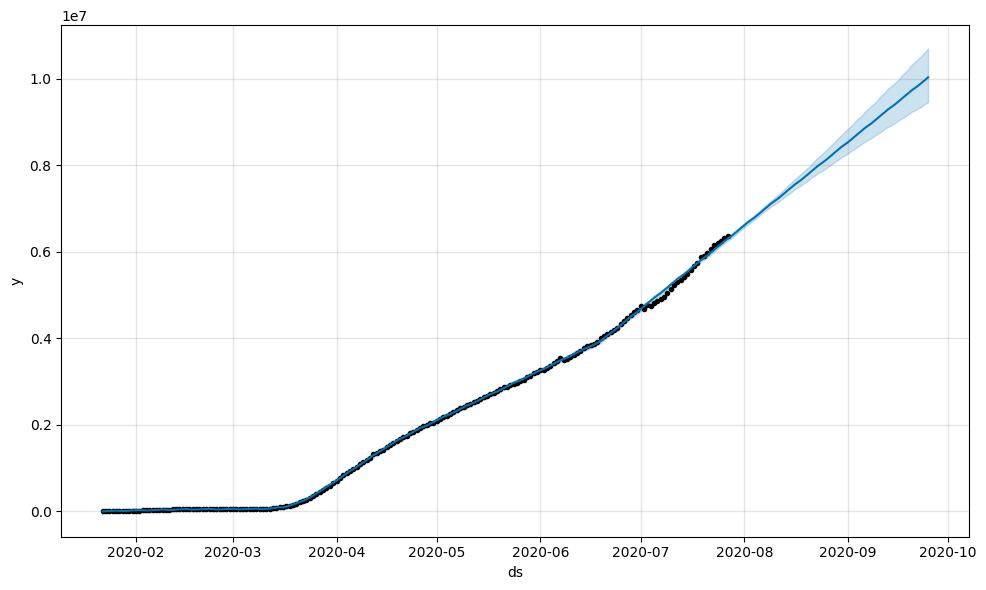

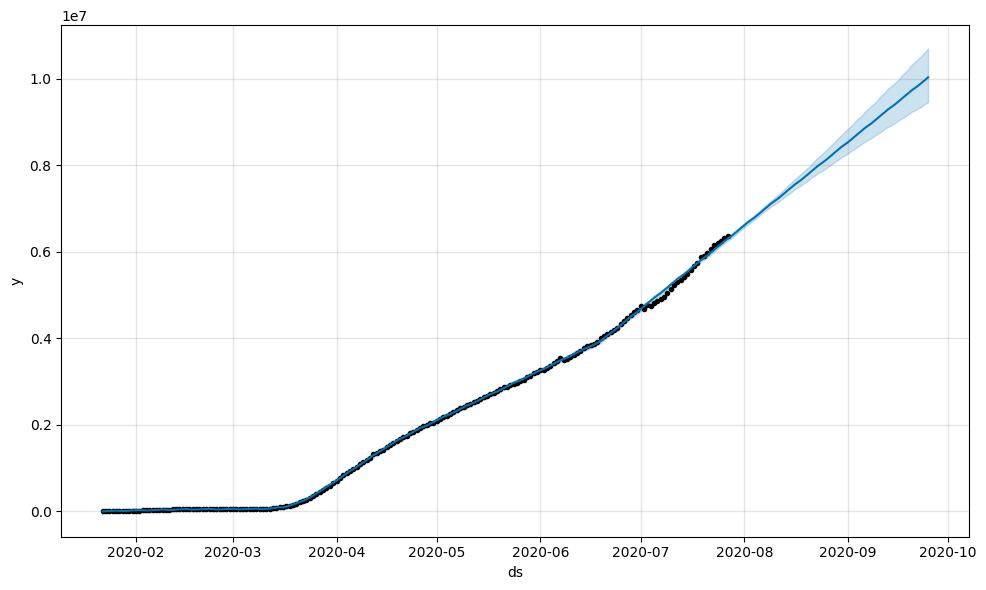

In [182]:
prophet_model.plot(forecast_future)

22:28:43 - cmdstanpy - INFO - Chain [1] start processing
22:28:43 - cmdstanpy - INFO - Chain [1] done processing


Forecasting for Confirmed
Forecasting for Deaths


22:28:43 - cmdstanpy - INFO - Chain [1] start processing
22:28:43 - cmdstanpy - INFO - Chain [1] done processing
22:28:43 - cmdstanpy - INFO - Chain [1] start processing
22:28:43 - cmdstanpy - INFO - Chain [1] done processing


Forecasting for Recovered


22:28:44 - cmdstanpy - INFO - Chain [1] start processing
22:28:44 - cmdstanpy - INFO - Chain [1] done processing


Forecasting for Active


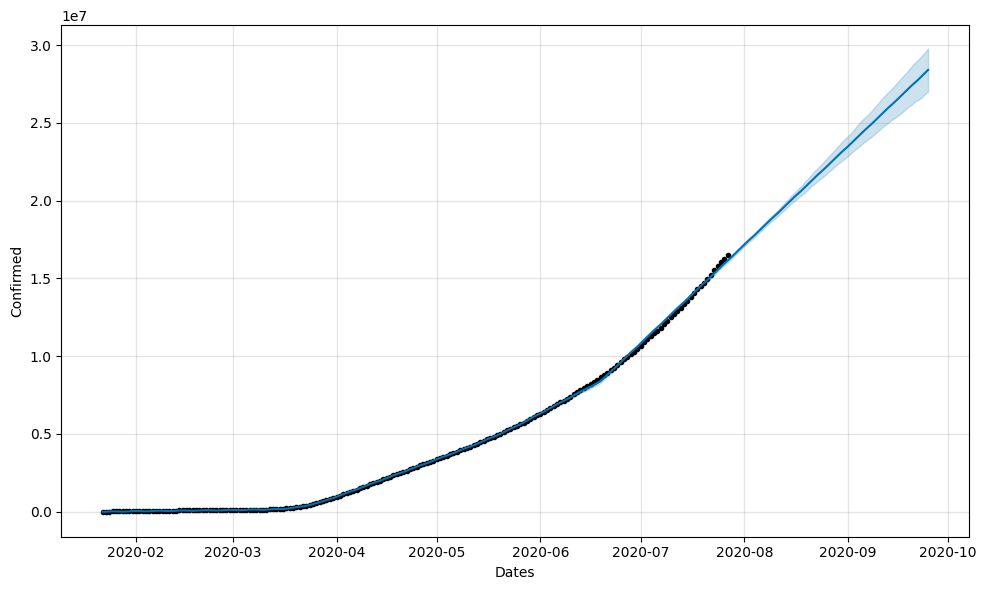

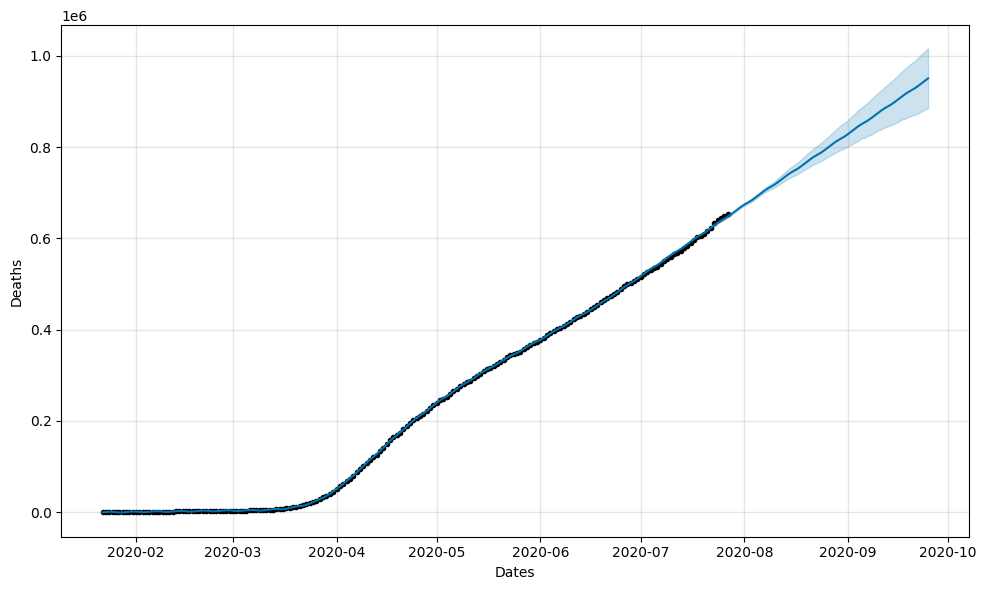

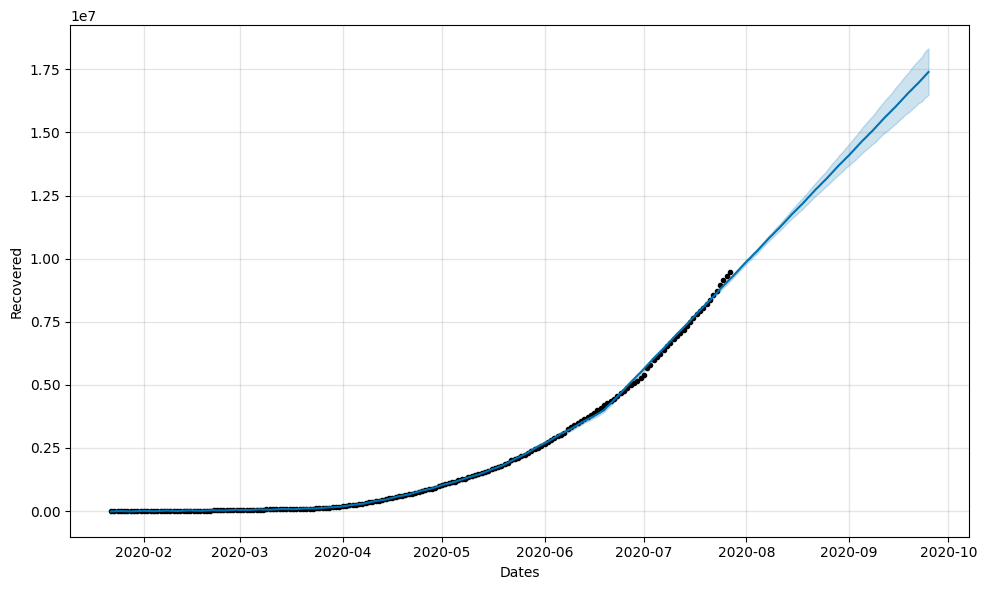

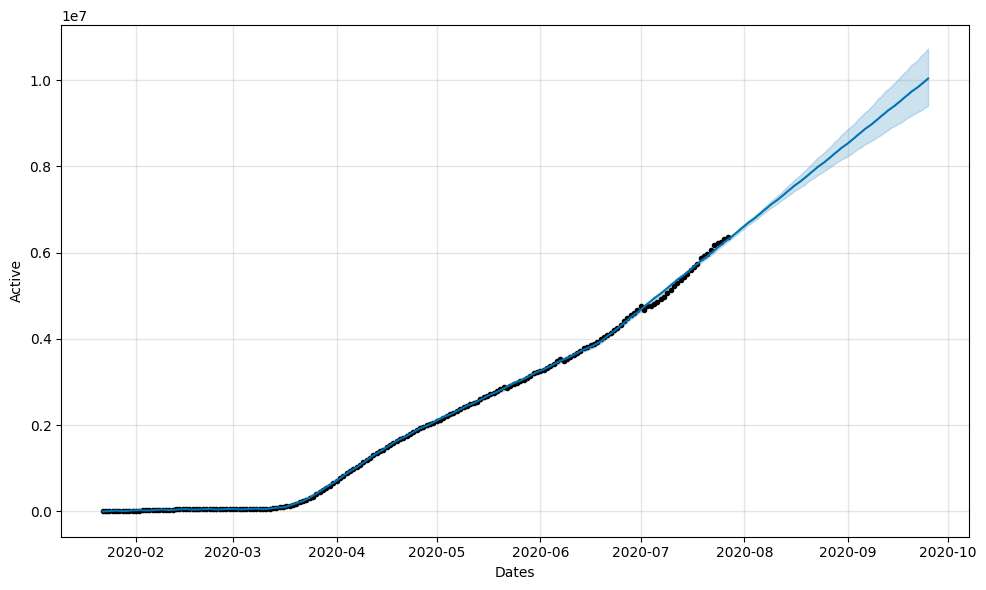

In [188]:
prophet_models={}
for i in cols:
    print(f"Forecasting for {i}")
    forecasting= df_forecast[['Date', i]]
    forecasting.index = range(0, forecasting.shape[0])
    forecasting.columns= ['ds', 'y']

    prophet_model= Prophet()
    prophet_model.fit(forecasting)

    future_days= prophet_model.make_future_dataframe(periods=60, freq='D')

    forecast_future= prophet_model.predict(future_days)
    prophet_models[i] = [prophet_model, forecast_future]

    prophet_model.plot(forecast_future, xlabel='Dates', ylabel=i)
    
    
    

## Plotting components

Plot for Confirmed
Plot for Deaths
Plot for Recovered
Plot for Active


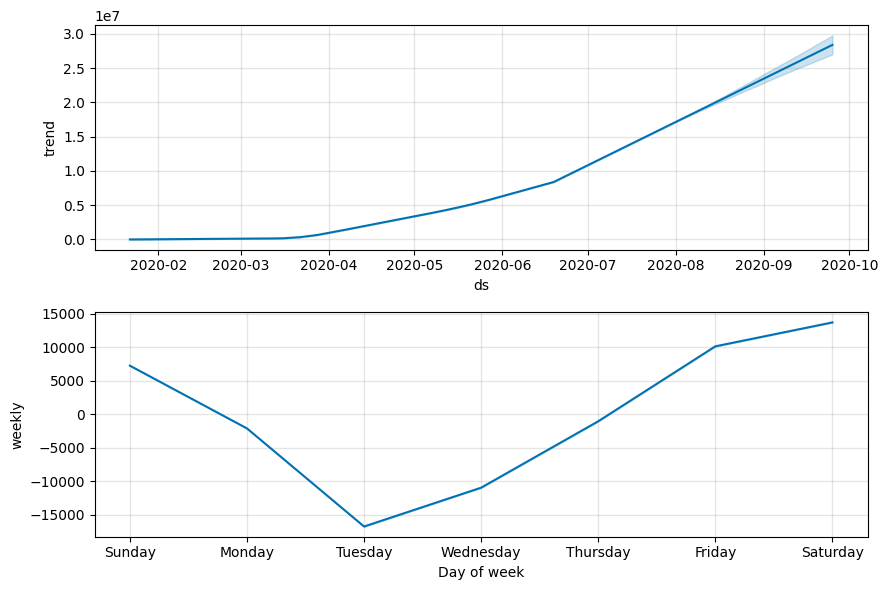

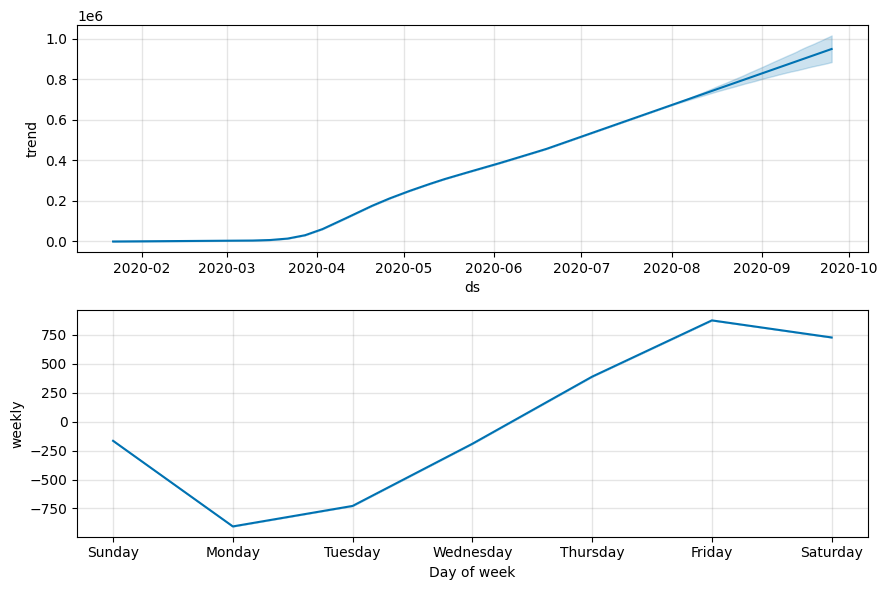

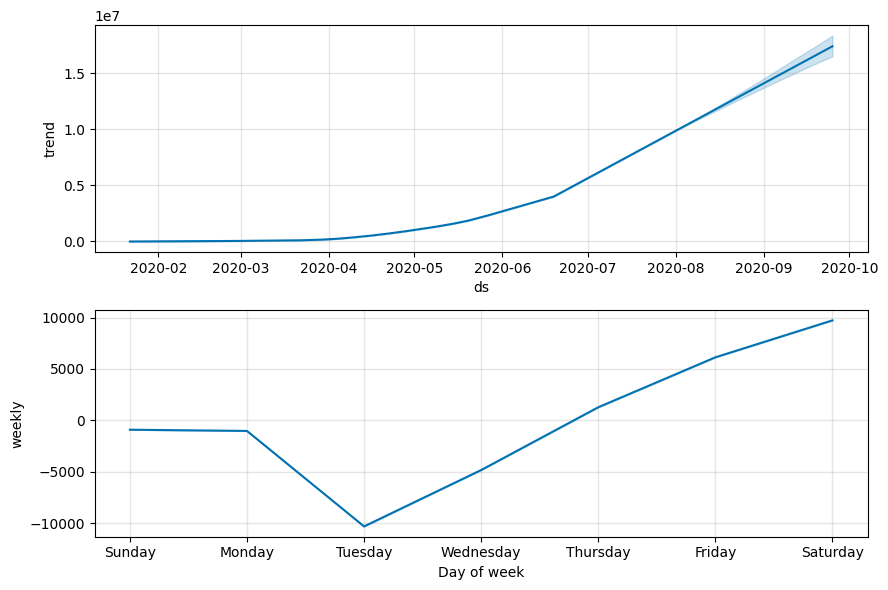

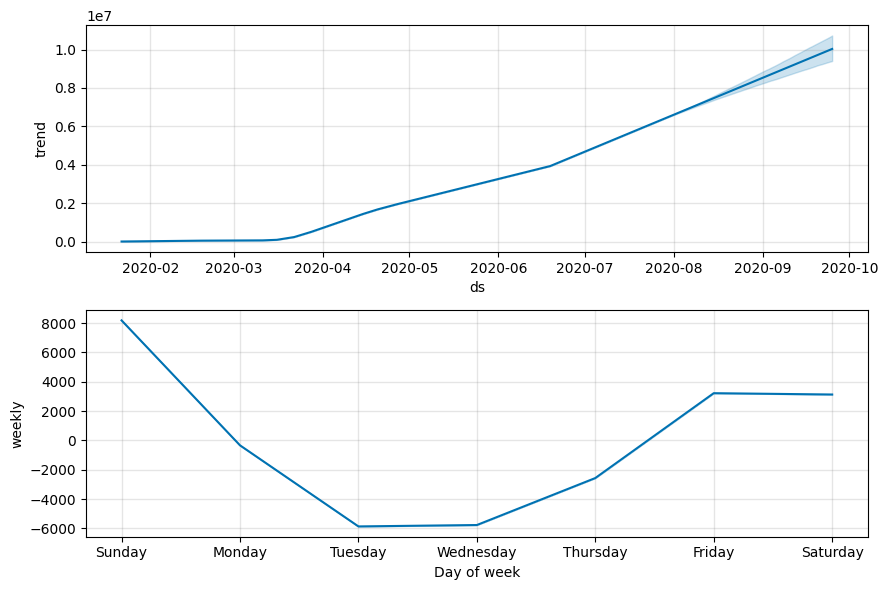

In [194]:
for i in prophet_models:
    print(f'Plot for {i}')
    prophet_models[i][0].plot_components(prophet_models[i][1])

In [198]:
## Forecasted Data for Confirmed
prophet_models['Confirmed'][1].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
243,2020-09-21,2.757406e+07,2.634498e+07,2.884992e+07,2.633072e+07,2.882870e+07,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,0.0,0.0,0.0,2.757191e+07
244,2020-09-22,2.777830e+07,2.647690e+07,2.904814e+07,2.650919e+07,2.904747e+07,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,0.0,0.0,0.0,2.776152e+07
245,2020-09-23,2.798254e+07,2.661026e+07,2.927039e+07,2.668307e+07,2.929295e+07,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,2.797155e+07
246,2020-09-24,2.818678e+07,2.683317e+07,2.950997e+07,2.683898e+07,2.951867e+07,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,2.818570e+07
247,2020-09-25,2.839102e+07,2.701324e+07,2.978122e+07,2.700378e+07,2.978105e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,2.840113e+07


In [199]:
## Forecasted Data for Active
prophet_models['Active'][1].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,393.864283,-50360.352973,41691.626353,393.864283,393.864283,-5768.245001,-5768.245001,-5768.245001,-5768.245001,-5768.245001,-5768.245001,0.0,0.0,0.0,-5374.380717
1,2020-01-23,2179.132524,-50943.980095,42420.246476,2179.132524,2179.132524,-2565.777101,-2565.777101,-2565.777101,-2565.777101,-2565.777101,-2565.777101,0.0,0.0,0.0,-386.644577
2,2020-01-24,3964.400764,-39429.590397,52363.175543,3964.400764,3964.400764,3219.382782,3219.382782,3219.382782,3219.382782,3219.382782,3219.382782,0.0,0.0,0.0,7183.783546
3,2020-01-25,5749.669005,-39780.234670,60504.656611,5749.669005,5749.669005,3129.564761,3129.564761,3129.564761,3129.564761,3129.564761,3129.564761,0.0,0.0,0.0,8879.233766
4,2020-01-26,7534.937245,-28894.887064,61414.155815,7534.937245,7534.937245,8182.557400,8182.557400,8182.557400,8182.557400,8182.557400,8182.557400,0.0,0.0,0.0,15717.494645


In [201]:
## Forecasted Data for Deaths
prophet_models['Deaths'][1].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
243,2020-09-21,929776.417290,871047.407090,9.886993e+05,871749.006308,9.896993e+05,-905.321485,-905.321485,-905.321485,-905.321485,-905.321485,-905.321485,0.0,0.0,0.0,928871.095805
244,2020-09-22,934807.422212,873482.261346,9.961468e+05,875064.098228,9.961406e+05,-728.289353,-728.289353,-728.289353,-728.289353,-728.289353,-728.289353,0.0,0.0,0.0,934079.132859
245,2020-09-23,939838.427134,878346.861559,1.003238e+06,878053.223312,1.003351e+06,-191.374799,-191.374799,-191.374799,-191.374799,-191.374799,-191.374799,0.0,0.0,0.0,939647.052335
246,2020-09-24,944869.432056,882352.663869,1.009778e+06,881794.802595,1.009734e+06,388.586941,388.586941,388.586941,388.586941,388.586941,388.586941,0.0,0.0,0.0,945258.018997
247,2020-09-25,949900.436978,885337.433718,1.016423e+06,885350.801083,1.016700e+06,874.801623,874.801623,874.801623,874.801623,874.801623,874.801623,0.0,0.0,0.0,950775.238602


In [202]:
## Forecasted Data for Recovered
prophet_models['Recovered'][1].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
243,2020-09-21,1.684263e+07,1.603402e+07,1.771950e+07,1.606263e+07,1.770066e+07,-1036.123578,-1036.123578,-1036.123578,-1036.123578,-1036.123578,-1036.123578,0.0,0.0,0.0,1.684159e+07
244,2020-09-22,1.697933e+07,1.616159e+07,1.785915e+07,1.617305e+07,1.786428e+07,-10324.870998,-10324.870998,-10324.870998,-10324.870998,-10324.870998,-10324.870998,0.0,0.0,0.0,1.696901e+07
245,2020-09-23,1.711604e+07,1.623467e+07,1.799431e+07,1.628297e+07,1.801784e+07,-4840.302869,-4840.302869,-4840.302869,-4840.302869,-4840.302869,-4840.302869,0.0,0.0,0.0,1.711120e+07
246,2020-09-24,1.725274e+07,1.638420e+07,1.821767e+07,1.638810e+07,1.818630e+07,1268.505419,1268.505419,1268.505419,1268.505419,1268.505419,1268.505419,0.0,0.0,0.0,1.725401e+07
247,2020-09-25,1.738945e+07,1.649329e+07,1.833040e+07,1.650233e+07,1.835603e+07,6127.046185,6127.046185,6127.046185,6127.046185,6127.046185,6127.046185,0.0,0.0,0.0,1.739558e+07
